# SHUBH SINHA - 210968172

## Week 02 - Churn Modelling

In [3]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#importing the tenserflow library
import tensorflow as tf

#importing keras and the layers
#keras is an API made on top of tensor flow, so that's why like this
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [4]:
#importing the dataset as a pandas dataframe
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
#displaying the dataframe
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#finding size of dataframe
df.shape

(10000, 14)

### Data Pre-processing

In [7]:
#checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#dropping irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [10]:
scaler = StandardScaler()
features = df.drop('Exited', axis=1)
scaled_features = scaler.fit_transform(features)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(scaled_features, df['Exited'], test_size=0.2, random_state=49)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=49)

### Perform experiments using (70,15,15) split and tabulate the performance in terms of Accuracy, Precision & Recall

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Define the experimental setups
hiddenLayers = [1, 2, 3]
unitsPerLayer = [[128, 0, 0], [128, 64, 0], [128, 64, 32]]
epochsList = [10, 20, 30]
activationunFction = 'sigmoid'
regularization = [None, l1(0.01), l2(0.01)]
learningRates = [0.1, 0.01, 0.001]

# Initialize results table
results = []

#experimental setups
for layers in hiddenLayers:
    for units in unitsPerLayer:
        for epochs in epochsList:
            for reg in regularization:
                for lr in learningRates:

                    #model building
                    model = Sequential()
                    model.add(Dense(units[0],
                                    activation='sigmoid',
                                    input_dim=X_train.shape[1],
                                    kernel_regularizer=reg))

                    for i in range(layers - 1):
                        model.add(Dense(units[i + 1],
                                        activation='sigmoid',
                                        kernel_regularizer=reg))

                    model.add(Dense(1, activation='sigmoid'))

                    #model summary
                    print("\nNew Model : ")
                    model.summary()

                    #model compilation
                    optimizer = SGD(learning_rate=lr)
                    model.compile(loss='binary_crossentropy',
                                  optimizer=optimizer,
                                  metrics=['accuracy'])

                    #model training
                    history = model.fit(X_train, y_train,
                                        validation_data=(X_val, y_val),
                                        epochs=epochs,
                                        batch_size=32,
                                        verbose=0)

                    #model evaluation
                    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

                    results.append([layers, units,
                                    epochs, reg, lr,
                                    loss, accuracy])

#results to a dataframe
resultsDF = pd.DataFrame(results, columns=['Layers', 'Units', 'Epochs', 'Regularization', 'Learning Rate', 'Loss', 'Accuracy'])

#displaying results dataframe
resultsDF


New Model : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________

New Model : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Tota

,Layers,Units,Epochs,Regularization,Learning Rate,Loss,Accuracy
0,1,"[128, 0, 0]",10,None,0.100,0.451601,0.809
1,1,"[128, 0, 0]",10,None,0.010,0.467708,0.782
2,1,"[128, 0, 0]",10,None,0.001,0.513774,0.775
3,1,"[128, 0, 0]",10,<keras.regularizers.L1 object at 0x7e89ac3cb6a0>,0.100,0.501933,0.775
4,1,"[128, 0, 0]",10,<keras.regularizers.L1 object at 0x7e89ac3cb6a0>,0.010,0.538592,0.775
...,...,...,...,...,...,...,...
238,3,"[128, 64, 32]",30,<keras.regularizers.L1 object at 0x7e89ac3cb6a0>,0.010,0.540649,0.775
239,3,"[128, 64, 32]",30,<keras.regularizers.L1 object at 0x7e89ac3cb6a0>,0.001,4.745664,0.775
240,3,"[128, 64, 32]",30,<keras.regularizers.L2 object at 0x7e89ac3c9060>,0.100,0.536806,0.775
241,3,"[128, 64, 32]",30,<keras.regularizers.L2 object at 0x7e89ac3c9060>,0.010,0.608030,0.775


In [13]:
#any random row for illustration
chosenSetup = resultsDF.iloc[0]

### Visualize the training and validation loss against the epochs and comment on optimal hyperparameters. 

In [15]:
#building model with best hypertuning
model = Sequential()
model.add(Dense(chosenSetup['Units'][0],
                activation='sigmoid',
                input_dim=X_train.shape[1],
                kernel_regularizer=chosenSetup['Regularization']))

for i in range(chosenSetup['Layers'] - 1):
    model.add(Dense(chosenSetup['Units'][i + 1],
                    activation='sigmoid',
                    kernel_regularizer=chosenSetup['Regularization']))

model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=chosenSetup['Learning Rate'])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#model training
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=chosenSetup['Epochs'],
                    batch_size=32, verbose=0)

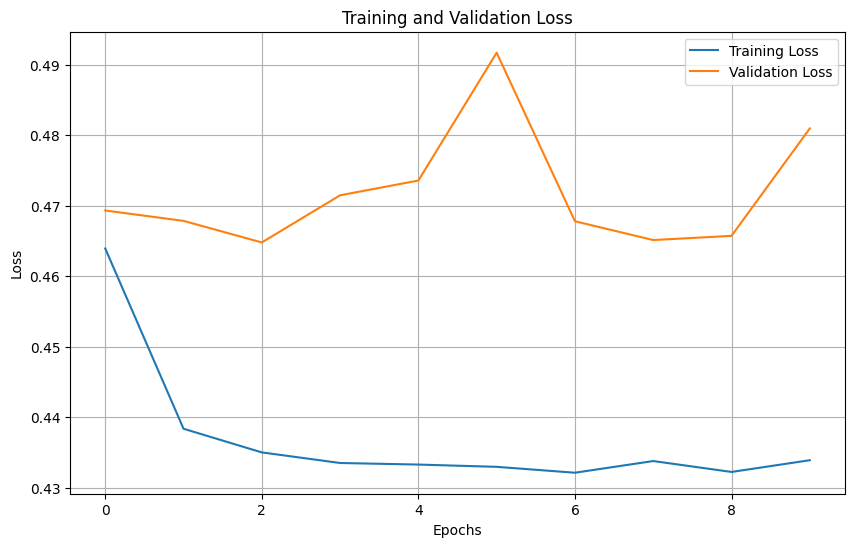

In [17]:
#training and validation loss against epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()